 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5607) </b> </h1> </center>

<b> Programming Assignment - 01 </b>

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.

NOTE: First 4 questions are taken from: http://lcsl.mit.edu/courses/cbmmss/machine_learning/labs/Lab1.html


<b> Assignment on K-nearest neighbour </b>

<b> Part - 1 :  Data Generation </b>
1. Use Gaussian distribution with appropriate parameters and produce a dataset with four classes and 30 samples per class: the classes must live in the 2D space and be centered on the corners of the unit square (0,0), (0,1) (1,1), (1,0), all with variance 0.3.
2. Obtain a 2-class train set [X, Y] by having data on opposite corners sharing the same class with labels +1 and -1.
3. Generate a test set [Xte, Yte] from the same distribution, starting with 200 samples per class.
4. Visualize both sets using scatter plot on a 2-D plane.


In [ ]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
import random
import math

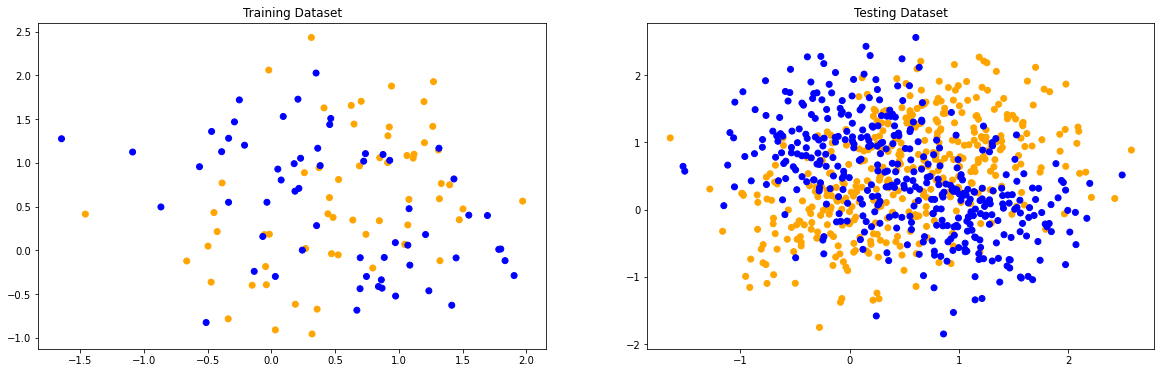

In [ ]:
########################################
#Part1-(1) #Generating training data
########################################
#Define means and covariances 
var=0.3
# var = 0.01
mean1=[0,0] #A
mean2=[0,1] #B
mean3=[1,1] #C
mean4=[1,0] #D
cov= var*np.eye(2)
#You may use "np.random.multivariate_normal" function 
########################################
#Part1-(b) #Generating training labels
########################################
#Produce a dataset with four classes and 30 samples per class
samples = 30
#A : (0,0)
data_A = np.random.multivariate_normal(mean1,cov,samples)
#B : (0,1)
data_B = np.random.multivariate_normal(mean2,cov,samples)
#C : (1,1)
data_C = np.random.multivariate_normal(mean3,cov,samples)
#D : (1,0)
data_D = np.random.multivariate_normal(mean4,cov,samples)
#Obtain a 2-class train set [X, Y] by having data on opposite corners sharing the same class with labels +1 and -1
#Lets choose (0,0),(1,1) to belong to +1 class and (0,1),(1,0) to belong to -1
X_class_1 = np.vstack((data_A,data_C))
Y_class_1 = np.ones((len(X_class_1),1))
X_class_2 = np.vstack((data_B,data_D))
Y_class_2 = -1*np.ones((len(X_class_2),1))
X  = np.vstack((X_class_1,X_class_2))
Y = np.vstack((Y_class_1,Y_class_2))
########################################
#Part1-(c) #Generating testing data with labels
########################################
# Generate a test set [Xte, Yte] from the same distribution, starting with 200 samples per class.
samples_test = 200
#A : (0,0)
data_A_test = np.random.multivariate_normal(mean1,cov,samples_test)
#B : (0,1)
data_B_test = np.random.multivariate_normal(mean2,cov,samples_test)
#C : (1,1)
data_C_test = np.random.multivariate_normal(mean3,cov,samples_test)
#D : (1,0)
data_D_test = np.random.multivariate_normal(mean4,cov,samples_test)
#Obtain a 2-class train set [X, Y] by having data on opposite corners sharing the same class with labels +1 and -1
#Lets choose (0,0),(1,1) to belong to +1 class and (0,1),(1,0) to belong to -1
X_class_1_test = np.vstack((data_A_test,data_C_test))
Y_class_1_test = np.ones((len(X_class_1_test),1))
X_class_2_test = np.vstack((data_B_test,data_D_test))
Y_class_2_test = -1*np.ones((len(X_class_2_test),1))
X_test  = np.vstack((X_class_1_test,X_class_2_test))
Y_test = np.vstack((Y_class_1_test,Y_class_2_test))
########################################
#Part1-(d) #Visualizing data
########################################
# colormap = 'green' if Y==1 else 'red'
colormap = []
for i in range(len(Y)):
    color= 'orange' if Y[i]==1 else 'blue'
    colormap.append(color)
colormap_test = []
for i in range(len(Y_test)):
    color = 'orange' if Y_test[i]==1 else 'blue'
    colormap_test.append(color)
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c=colormap)
plt.title("Training Dataset")
plt.subplot(1,2,2)
plt.scatter(X_test[:,0],X_test[:,1],c=colormap_test)
plt.title("Testing Dataset")
plt.show()

<b> Part - 2: K-NN Classification  </b> The k-Nearest Neighbors algorithm (kNN) assigns to a test point the most frequent label of its k closest examples in the training set.
1. Write a function kNNClassify to generate predictions Yp for the 2-class data generated at Part1. Pick a ”reasonable” k.
2. Evaluate the classification performance (prediction error) by comparing the predicted labels Y_pred to the true labels Y_test.
3. Visualize the obtained results, e.g. by plotting the wrongly classified points using different colors/markers
4. Write a function to generate & visualize the decision regions of the 2D plane that are associated with each class, for a given classifier. Overlay the test points using scatter.


k selected :  31
Accuracy obtained fron the kNN classification : 69.375 %


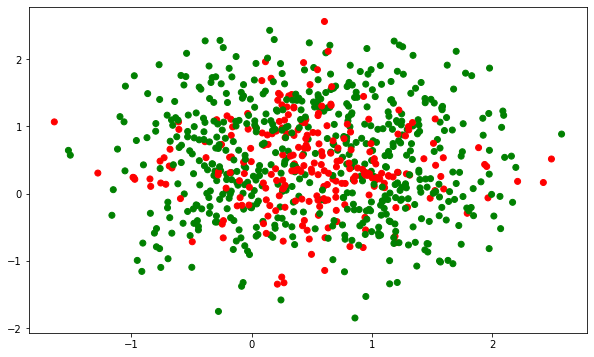

In [ ]:
########################################
#Part2-(1) #Define kNNClassify Function
########################################

def classify(X_train,Y_train,x,k):
    diff = (X_train-x)**2
    dist_vec = np.sqrt(np.matmul(diff,np.ones((2,1))))
    # print(dist_vec.shape)
    # print("Distance",dist_vec)
    args = np.argsort(dist_vec.T)
    # print(args.shape,Y_train.shape)
    # print("Args : ",args[0,:k])
    neighbors = Y_train[args[0,:k].T]
    # print("Neighbors : ",neighbors)
    label = 1 if np.sum(neighbors)>0 else -1
    # print(label)
    return label

def kNNClassify(X_train,Y_train,X_test,k):
    n = len(X_test)
    pred = np.ones((n,1))
    for i in range(n):
        pred[i] = classify(X_train,Y_train,X_test[i],k)
    return pred

########################################
#Part2-(2) #Define a function to evaluate the performance
########################################
def KNNAccuracy(true,pred):
    err = true==pred
    correct = np.count_nonzero(err)
    total = len(pred)
    accuracy = correct/total
    return accuracy*100


#Compute and print the classification accuracy 
# Here X is the X_train and X_test is the X_test
k = 31
pred = kNNClassify(X,Y,X_test,k)
accuracy = KNNAccuracy(Y_test,pred)
# print("Prediction :\n",pred)
# print("Truth :\n",Y_test)
print("k selected : ", k)
print("Accuracy obtained fron the kNN classification : {} %".format(accuracy))

########################################
#Part2-(c) #Plot the error points with different color
########################################
colormap = []
for i in range(len(pred)):
    color= 'green' if Y_test[i]==pred[i] else 'red'
    colormap.append(color)
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0],X_test[:,1],c=colormap)
plt.show()

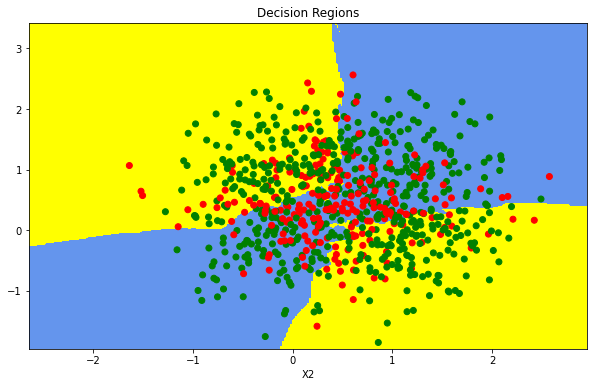

In [ ]:
from matplotlib.colors import ListedColormap
def Visulaize(X_test,colormap,X_train,Y_train,h = .02,k=31):
    cmap_back = ListedColormap(['yellow', 'cornflowerblue'])
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    length,breadth = xx.shape
    # print(xx.shape,yy.shape)
    prediction_area = np.ones(xx.shape)
    for i in range(length):
        for j in range(breadth):
            prediction_area[i,j] = classify(X_train,Y_train,np.array([xx[i,j],yy[i,j]]).reshape((1,2)),k=31)
    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, prediction_area, cmap=cmap_back)
    plt.scatter(X_test[:,0],X_test[:,1],c=colormap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Decision Regions")
    plt.xlabel("X1")
    plt.xlabel("X2")
    plt.show()
Visulaize(X_test,colormap,X,Y,h=.02,k=31)

<b> Part - 3: Parameter selection: What is good value for k?  </b>

So far we considered an arbitrary choice for k. You will now wrrite the function *holdoutCVkNN* for model selection
1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for
validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out
procedure may be quite unstable.


> (a). Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.

> (b). Repeat the process for 10 times using a random cross-validation set each time with
a ρ = 0.3

> (c). Plot the training and validation errors for the different values of k.

> (d). How would you now answer the question "what is the best value for k"?

2. How is the value of k affected by ρ (percentage of points held out) and number of
repetitions? What does a large number of repetitions provide?
3. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.

Holdout Cross Validation



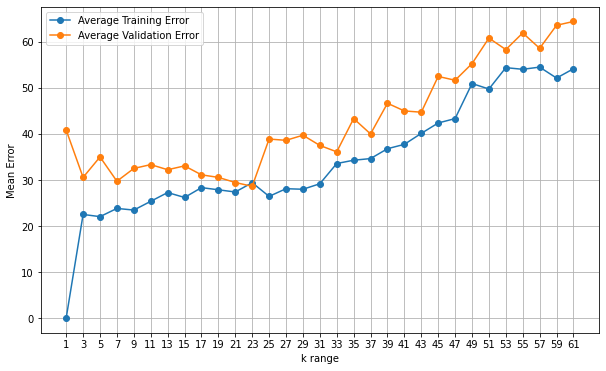

Optimal k :  23
The answer is based on optimizing the mean validation error.



In [ ]:
####################################
#Part - 3 (1)
####################################
#Function for error calculations
def err_calc(truth,pred):
    errors = np.count_nonzero(truth-pred)
    total = len(truth)
    return errors/total
#Define holdoutCVkNN() Function
def holdoutCVkNN(k_range,numrep,rho,X,Y):
    n = len(X)
    n_tr = int(np.ceil(n*(1-rho)))
    err_tr_dat = np.zeros((len(k_range),numrep))
    err_val_dat = np.zeros((len(k_range),numrep))
    idx = np.arange(n)
    #Iterate through range of k values
    for k in k_range:
        #Iterate through number of repetations
        for r in range(numrep):
            np.random.shuffle(idx)
            #Hold out rho fraction of training data in each repetition.
            idx_tr = idx[:n_tr]
            X_train = X[idx_tr,:]
            Y_train = Y[idx_tr,:]
            idx_val = idx[n_tr:]
            X_val = X[idx_val,:]
            Y_val = Y[idx_val,:]
            # Training 
            pred_tr = kNNClassify(X_train,Y_train,X_train,k)
            err_tr = 100-KNNAccuracy(pred_tr,Y_train)
            err_tr_dat[int((k-1)/2),r] = err_tr
            #Validation
            pred_val = kNNClassify(X_train,Y_train,X_val,k)
            err_val = 100-KNNAccuracy(pred_val,Y_val)
            err_val_dat[int((k-1)/2),r] = err_val
    avg_tr = (err_tr_dat@np.ones((numrep,1)))/numrep
    avg_val = (err_val_dat@np.ones((numrep,1)))/numrep
    #Return errors on training and validation data
    opt_k = k_range[np.argmin(avg_val)]
    return avg_tr,avg_val,opt_k

print('\033[1m' + 'Holdout Cross Validation')
print('\033[0m')
k_range = np.arange(1,63,2)
numrep = 10
rho = 0.3
avg_tr,avg_val,opt_k = holdoutCVkNN(k_range,numrep,rho,X,Y)

#Plot training and validation errors for different values of k 
plt.figure(figsize=(10,6))
plt.plot(k_range,avg_tr,marker='o')
plt.plot(k_range,avg_val,marker='o')
plt.xticks(k_range)
plt.legend(["Average Training Error","Average Validation Error"])
plt.xlabel("k range")
plt.ylabel("Mean Error")
plt.grid()
plt.show()
#what is the best value for k? 
print("Optimal k : ",opt_k)
print("The answer is based on optimizing the mean validation error.\n")


Effect of rho and number repetations on k



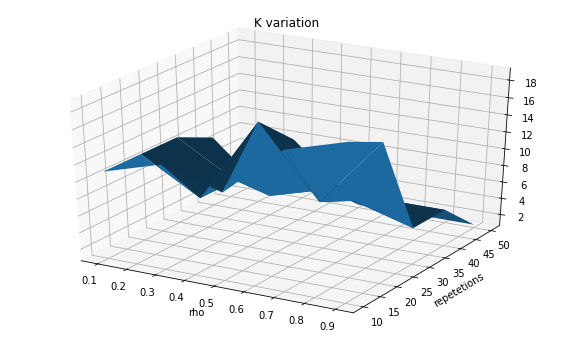

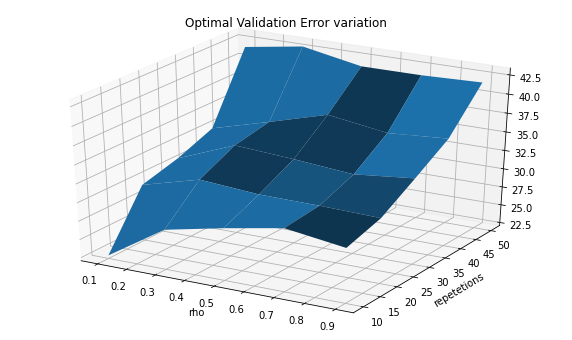

Most Optimal k for the whole simulation :  11.0


In [ ]:
####################################
#Part3 - (2): Effect of rho and number repetations on k
####################################
print('\033[1m' + 'Effect of rho and number repetations on k')
print('\033[0m')
k_range = np.arange(1,21,2)
rho = np.arange(0.1,1,0.2)
numrep = 10*np.arange(1,6,1)
# print(rho.shape,numrep.shape)
K_dat = np.zeros((len(rho),len(numrep)))
Val_Err = np.zeros(K_dat.shape)
for i in range(len(rho)):
    r = rho[i]
    for j in range(len(numrep)):
        n = numrep[j]
        avg_tr,avg_val,opt_k = holdoutCVkNN(k_range,n,r,X,Y)
        K_dat[i,j] = opt_k
        Val_Err[i,j] = np.min(avg_val)
col = np.argmin(Val_Err)
row = np.argmin(Val_Err[:,col])
K_optimal = K_dat[row,col]
plt.figure(figsize=(10,6))
R_mesh,N_mesh = np.meshgrid(rho,numrep)
ax = plt.axes(projection='3d')
ax.plot_surface(R_mesh, N_mesh, K_dat)
ax.set_title("K variation")
ax.set_xlabel("rho")
ax.set_ylabel("repetetions")
plt.figure(figsize=(10,6))
R_mesh,N_mesh = np.meshgrid(rho,numrep)
ax = plt.axes(projection='3d')
ax.plot_surface(R_mesh, N_mesh, Val_Err)
ax.set_title("Optimal Validation Error variation")
ax.set_xlabel("rho")
ax.set_ylabel("repetetions")
plt.show()
print("Most Optimal k for the whole simulation : ",K_optimal)

k selected :  11.0
Accuracy obtained fron the kNN classification : 69.875 %


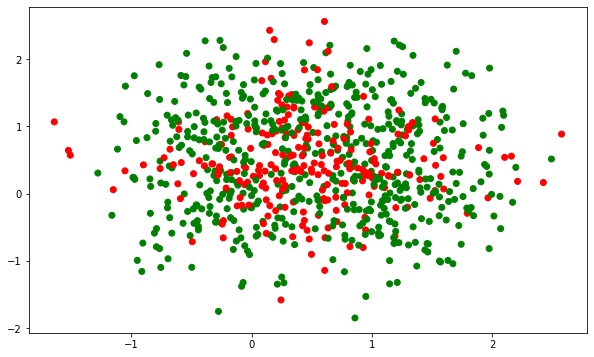

In [ ]:
####################################
#Part3 - (3): Evaluate the performance on test set with the best hyper parameters ( i.e best k ). 
####################################
pred = kNNClassify(X,Y,X_test,int(K_optimal))
accuracy = KNNAccuracy(Y_test,pred)
# print("Prediction :\n",pred)
# print("Truth :\n",Y_test)
print("k selected : ", K_optimal)
print("Accuracy obtained fron the kNN classification : {} %".format(accuracy))

########################################
#Part2-(c) #Plot the error points with different color
########################################
colormap = []
for i in range(len(pred)):
    color= 'green' if Y_test[i]==pred[i] else 'red'
    colormap.append(color)
plt.figure(figsize = (10,6))
plt.scatter(X_test[:,0],X_test[:,1],c=colormap)
plt.show()

<b> Part - 4: Size of training data and kNN regression  </b>

1. Dependence on training size: Evaluate the performance as the size of the training set
grows, e.g., n = {50, 100, 300, 500,...}. How would you choose a good range for k as n
changes? What can you say about the stability of the solution? Check by repeating the
validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or
adding noise by randomly flipping the labels on the training set.

In [ ]:
mean = np.array([[0,0],[0,1],[1,1],[1,0]])
print(mean[0])

[0 0]


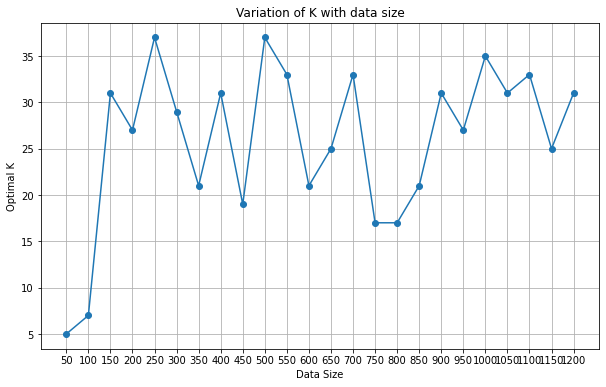

In [ ]:
##################################
#Part4 - (1): Performance evaluation as n increases
##################################
def dataGen(n,mean = np.array([[0,0],[0,1],[1,1],[1,0]]),var = 0.3):
    samples = int(np.ceil(n/4))
    cov= var*np.eye(2)
    #A : (0,0)
    data_A = np.random.multivariate_normal(mean[0],cov,samples)
    #B : (0,1)
    data_B = np.random.multivariate_normal(mean[1],cov,samples)
    #C : (1,1)
    data_C = np.random.multivariate_normal(mean[2],cov,samples)
    #D : (1,0)
    data_D = np.random.multivariate_normal(mean[3],cov,n-(3*samples))
    #Obtain a 2-class train set [X, Y] by having data on opposite corners sharing the same class with labels +1 and -1
    #Lets choose (0,0),(1,1) to belong to +1 class and (0,1),(1,0) to belong to -1
    X_class_1 = np.vstack((data_A,data_C))
    Y_class_1 = np.ones((len(X_class_1),1))
    X_class_2 = np.vstack((data_B,data_D))
    Y_class_2 = -1*np.ones((len(X_class_2),1))
    X  = np.vstack((X_class_1,X_class_2))
    Y = np.vstack((Y_class_1,Y_class_2))
    return X,Y

def DataSizeRelation(dataSizes,X_test,Y_test,mean = np.array([[0,0],[0,1],[1,1],[1,0]]),var=0.3,rho=0.3,numrep=10):
    d = len(dataSizes)
    optimal_k = np.zeros((d,1))
    for i in range(d):
        X,Y = dataGen(dataSizes[i],mean,var)
        k_range = np.arange(1,40,2)
        _ , _,optimal_k[i] = holdoutCVkNN(k_range,numrep,rho,X,Y)
    plt.figure(figsize=(10,6))
    plt.plot(dataSizes,optimal_k,marker="o")
    plt.xlabel("Data Size")
    plt.ylabel("Optimal K")
    plt.xticks(dataSizes)
    plt.grid()
    plt.title("Variation of K with data size")
    plt.show()
    
dataSizes = np.arange(50,1250,50)
DataSizeRelation(dataSizes,X_test,Y_test,mean = np.array([[0,0],[0,1],[1,1],[1,0]]),var=0.3,rho=0.3,numrep=10)

In [ ]:
##################################
#Part4 - (2): Ablation analysis : Mention classification accuracy on dataset with changing the variance and noise level
##################################
variance = 0.5
k_range = np.arange(1,100,2)
numrep=10
rho=0.3
X,Y = dataGen(n=1000,mean = np.array([[0,0],[0,1],[1,1],[1,0]]),var = variance)
_ , _,optimal_k= holdoutCVkNN(k_range,numrep,rho,X,Y)
X_test,Y_test = dataGen(n=500,mean = np.array([[0,0],[0,1],[1,1],[1,0]]),var = variance)
pred = kNNClassify(X,Y,X_test,optimal_k)
accuracy = KNNAccuracy(Y_test,pred)
print("k selected : ", k)
print("Accuracy obtained fron the kNN classification : {} %".format(accuracy))

k selected :  31
Accuracy obtained fron the kNN classification : 64.2 %


<b> Part - 5: Digit classification on MNIST data  </b>
[[link to download MNIST data]( http://yann.lecun.com/exdb/mnist/)]
1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector.
> NOTE : If you had already written a kNNClassify for multi class classification in part 2, you are free to use it.
2. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
3. Apply these values to evaluate the performance on the test dataset.
4. Create a confusion matrix to understand the most confused classes (digits).
5. Suggest alternate ways to improve the performance.




In [ ]:
from mlxtend.data import loadlocal_mnist
#Mount the drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
########################################
#Part5-(1) MNIST data reading and defining MultiClassKNNClassify
########################################

# MNIST Data reading ( you may define your own function for reading MNIST data )
#Extract .gz files and place in the drive 
# drive.mount('/content/drive',force_remount=True)
root_path='/content/gdrive/MyDrive/PRML_22/Programming_Assignments/Assignment_1'
train_data_path = str(root_path) + "/" + 'train-images.idx3-ubyte'
train_label_path = str(root_path) + "/" + 'train-labels.idx1-ubyte'
test_data_path = str(root_path) + "/" + 't10k-images.idx3-ubyte'
test_label_path = str(root_path) + "/" + 't10k-labels.idx1-ubyte'
X_train, Y_train = loadlocal_mnist(images_path=train_data_path, labels_path=train_label_path)
X_test, Y_test = loadlocal_mnist(images_path=test_data_path, labels_path=test_label_path)
trainSize = len(Y_train)
testSize = len(Y_test)

Mounted at /content/gdrive


X_train Shape :  (60000, 784)
Y_train Shape :  (60000,)
X_test Shape :  (10000, 784)
Y_test Shape :  (10000,)
Training Data Sample :
Id :  25557


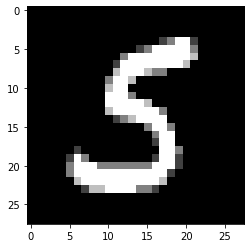

Label :  5

Testing Data Sample :
Id :  5297


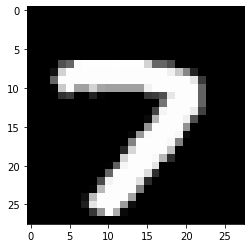

Label :  7


In [ ]:
print("X_train Shape : ",X_train.shape)
print("Y_train Shape : ",Y_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_test Shape : ",Y_test.shape)

# Samples 
id = np.random.randint(0,trainSize)
print("Training Data Sample :")
print("Id : ",id)
img = X_train[id].reshape(28,28)
plt.imshow(img,cmap="gray")
plt.show()
print("Label : ",Y_train[id])
id = np.random.randint(0,testSize)
print("\nTesting Data Sample :")
print("Id : ",id)
img = X_test[id].reshape(28,28)
plt.imshow(img,cmap="gray")
plt.show()
print("Label : ",Y_test[id])

In [ ]:
#Euclidean Distance Metric
def dist_vec(X,x):
    n = len(X)
    dvec = np.zeros((n,1))
    for i in range(n):
        diff = X[i,:].T-x.T
        dvec[i,0] = np.sqrt(np.sum(diff**2))
    # print(dvec)
    return dvec

def MultiClassify(X_train,Y_train,x,k,error_func=dist_vec):
    dvec = dist_vec(X_train,x) 
    # print(dvec.shape)
    #Obtain k closest training data points
    args = np.argsort(dvec.T)
    # print(args.shape)
    # print("Args: ",args)
    neighbors = Y_train[args[0,:k]]
    # print("Neighbors : ",neighbors)
    #Assign label to test point based on majority voting
    vals,counts = np.unique(neighbors, return_counts=True)
    # print("Hist :",vals,counts)
    label_index = np.argmax(counts)
    label = vals[label_index]
    return label
def MultiClassKNNClassify(X_train,Y_train,X_test,k,error_func=dist_vec):
    #error_func : For empirical selection of error function. egs : euclidean or any other distance metrics
    #Initialize an array/list to store the labels
    Y_pred = []
    #Iterate through the test data  
    for x in X_test:
        #Iterate through the training data
        #Compute the error between test data and training data 
        label = MultiClassify(X_train,Y_train,x,k,error_func)
        Y_pred.append(label)
    return np.asarray(Y_pred)

def Accuracy(truth,pred):
    n = len(truth)
    t = np.asarray(truth).reshape((n,1))
    p = np.asarray(pred).reshape((n,1))
    err = (t==p)
    acc = (np.count_nonzero(err)/n)*100
    return acc




In [ ]:
########################################
#Part5-(2) Empirically chose most suitable k and error function based on the evauation on cross-validation data
########################################
#You may use fraction of training data for validation
#We will consider only part of the data to avoid the long computation times
p = 0.05
tr_size = int(p*trainSize)
te_size = int(p*testSize)
print(tr_size,te_size)

3000 500


In [ ]:
data_train = np.hstack((X_train,Y_train.reshape((trainSize,1))))
data_test = np.hstack((X_test,Y_test.reshape((testSize,1))))
np.random.shuffle(data_train)
np.random.shuffle(data_test)
# print(data_train.shape,data_test.shape)
rho=0.3
tr_subz = int(tr_size*rho)
#Feature Data
X_tr_whole = data_train[:tr_size,:-1]
X_tr = X_tr_whole[:tr_subz,:]
X_val = X_tr_whole[tr_subz:,:]
X_te = data_test[:te_size,:-1]
#Labels
Y_tr_whole = data_train[:tr_size,-1:]
Y_tr = Y_tr_whole[:tr_subz,:]
Y_val = Y_tr_whole[tr_subz:,:]
Y_te = data_test[:te_size,-1:]

In [ ]:
l=MultiClassify(X_tr,Y_tr,x=X_tr[16,:],k=1,error_func=dist_vec)
print(l,Y_tr[16])

(900, 1)
(1, 900)
Neighbors :  [[0]]
Hist : [0] [1]
0 [0]


In [ ]:

########################################
#Part5-(3) Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation
########################################
K = np.arange(1,100,10)
# K = [1]
Tr_per = []
Val_per = []
Te_per = []
for k in K:
    # print("K : ",k)
    #Training
    Y_pred_train = MultiClassKNNClassify(X_tr,Y_tr,X_tr,k)
    Train_acc = Accuracy(Y_tr,Y_pred_train)
    # print("Training Accuracy : : {} %".format(Train_acc))
    #Validation
    Y_pred_val = MultiClassKNNClassify(X_tr,Y_tr,X_val,k)
    Val_acc = Accuracy(Y_val,Y_pred_val)
    # print("Validation Accuracy : : {} %".format(Val_acc))
    #Testing 
    # Y_pred_test = MultiClassKNNClassify(X_tr,Y_tr,X_test,k)
    Y_pred_test = MultiClassKNNClassify(X_tr,Y_tr,X_te,k)
    Test_acc = Accuracy(Y_te,Y_pred_test)
    # print("Test Accuracy : : {} %".format(Test_acc))
    Tr_per.append(Train_acc)
    Val_per.append(Val_acc)
    Te_per.append(Test_acc)


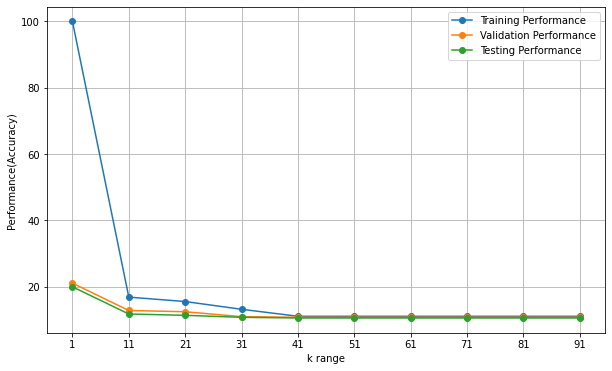

Best Case :
K :  1
Training Accuracy : : 100.0 %
Validation Accuracy : : 21.095238095238095 %
Testing Accuracy : : 20.0 %


In [ ]:
#Plot training and validation errors for different values of k 
plt.figure(figsize=(10,6))
plt.plot(K,Tr_per,marker='o')
plt.plot(K,Val_per,marker='o')
plt.plot(K,Te_per,marker='o')
plt.xticks(K)
plt.legend(["Training Performance","Validation Performance","Testing Performance"])
plt.xlabel("k range")
plt.ylabel("Performance(Accuracy)")
plt.grid()
plt.show()
#what is the best value for k? 
ind = np.argmax(Te_per)
opt_k = K[ind]
print("Best Case :")
print("K : ",opt_k)
print("Training Accuracy : : {} %".format(Tr_per[ind]))
print("Validation Accuracy : : {} %".format(Val_per[ind]))
print("Testing Accuracy : : {} %".format(Te_per[ind]))

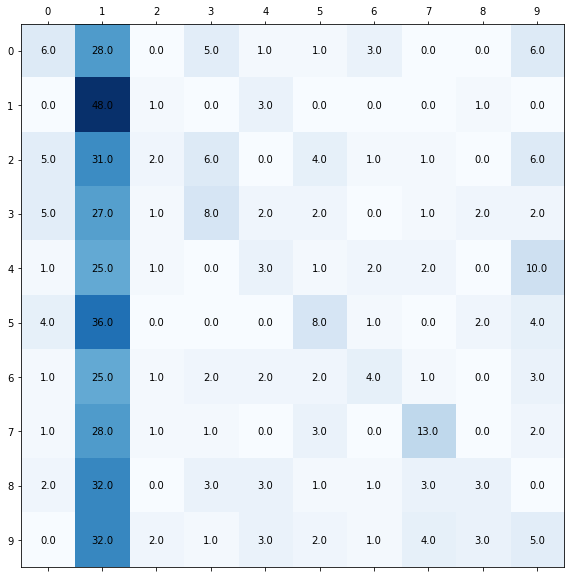

In [ ]:
########################################
#Part5-(4) Create a confusion matrix for test data
########################################
#Define a function to obain the confusion matrix table
def compute_confusion_matrix(true, pred):
    n = len(true)
    CM = np.zeros((10,10)) 
    for i in range(n):
        # print(true[i],pred[i])
        CM[true[i],pred[i]] += 1

    fig, ax = plt.subplots(figsize=(10,10))
    ax.matshow(CM, cmap=plt.cm.Blues)
    for i in range(10):
        for j in range(10):
            c = CM[j,i]
            ax.text(i, j, str(c), va='center', ha='center',color='black')
    plt.xticks(np.arange(10))
    plt.yticks(np.arange(10))
    plt.show()
Y_pred_test = MultiClassKNNClassify(X_tr,Y_tr,X_te,opt_k)
compute_confusion_matrix(Y_te,Y_pred_test)

########################################
#Part5-(5) Suggest an alternative ways to improve performance
########################################
1. By considering the larger dataset we might get better answer.
2. The k_range can be increased to find the right fit.
3. To improve the kNN, a better distance heuristic can be used instead of euclidean distance. 
4. Applying kNN for the above problem, is not optimal as the recognition doesnt account for the positional invariance. Rather a sequential network is better suited for the above purpose.

<b> Report  </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution<br>
Ans : 69.375%
2. Write down the best accuracy on MNIST validation and test data.<br>
Ans : 20%
3. Report your analysis<br>
Ans : KNN Classification does not give a great performance on larger datasets. The Hypertuned parameters tuning is purely empirical making the analysis very less robust.


